# K-means clustering

## import library

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [43]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

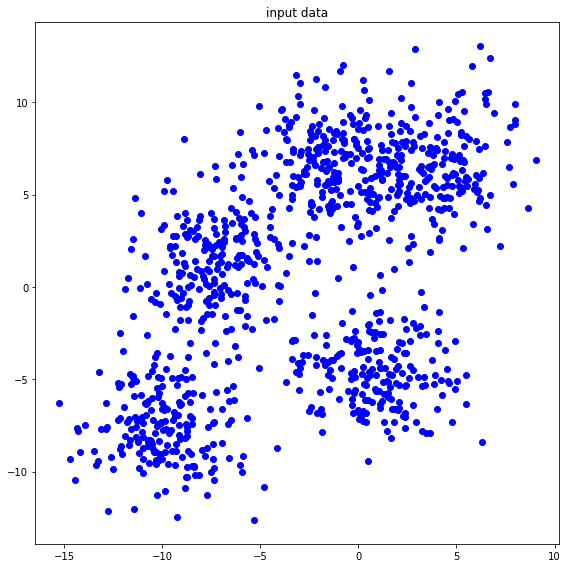

In [44]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [45]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # feature : n: 데이터의 수 m: 피처의 수(여기선 2가 됨.)
    # center 는 x좌표에 대한 centroid, y좌표에 대한 centroid
    distance =(feature - center) ** 2
    distance = np.sqrt(distance[:,0]+distance[:,1])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [46]:
def compute_centroid(feature, label_feature, label, prev_centroid):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # n개의 포인트에 대한 레이블. value_label = label 하나의 레이블, 
    # 해당 label 을 갖는 feature point 들의 x 평균값, y 평균값 구해서 (x,y) 로 만들어내기
    # centroid 가 결정되지 못할 때 이전의 centroid 값을 그대로 가져온다.
    centroid = prev_centroid
    idx = np.where(label_feature == label)
    feature_cluster = feature[idx]

    if len(feature_cluster) != 0: 
        centroid = feature_cluster.sum(axis=0) / len(feature_cluster)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [47]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 각각의 피처 거리 구해지면 각각의 클러스터에 대한 distance 주어지면, 
    label_feature = np.argmin(distance, axis=1)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## compute loss

In [48]:
def compute_loss(feature, label_feature, centroid, number_cluster):
    
    # (point z - centroid of cluster)을 제곱한 값들의 합.을 모든 number_cluster 에 대해서 또 합. 나누기 n
   
    n = np.size(label_feature, 0)
    loss = 0
    for i in range(number_cluster):
        feature_cluster_index = np.where(label_feature == i)
        loss = loss + np.sum(compute_distance(feature[feature_cluster_index], centroid[i]))
    loss = loss/n
    return loss


## the number of clusters $K = 2$

In [49]:
number_cluster          = 2
number_iteration        = 1000     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [51]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
# 최종적으로 Label_feature_02 에 최종 클러스터링 레이블이 저장되면 된다.
# centroid 가 결정되지 못하는 경우가 있다. 그 이전의 클러스터 레이블을 유지하도록 하면 된다.
# centroid 에 해당하는 feature point 가 하나도 없다면 이전 포인트를 유지해준다.

# optimize 할 때 현재의 

centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_02, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_02 = compute_label(distance)
    loss_02 = compute_loss(feature, label_feature_02, centroid, number_cluster)
    centroid_iteration_02[i] = centroid
    loss_iteration_02[i] = loss_02
    print("iter : %d loss : %lf\n" % (i, loss_iteration_02[i]))
# ++++++++++++++++++++++++++++++++++++++++++++++++++

iter : 0 loss : 6.591194

iter : 1 loss : 6.076421

iter : 2 loss : 5.386860

iter : 3 loss : 5.227687

iter : 4 loss : 5.160375

iter : 5 loss : 5.115723

iter : 6 loss : 5.102476

iter : 7 loss : 5.097319

iter : 8 loss : 5.095396

iter : 9 loss : 5.093896

iter : 10 loss : 5.093077

iter : 11 loss : 5.093077

iter : 12 loss : 5.093077

iter : 13 loss : 5.093077

iter : 14 loss : 5.093077

iter : 15 loss : 5.093077

iter : 16 loss : 5.093077

iter : 17 loss : 5.093077

iter : 18 loss : 5.093077

iter : 19 loss : 5.093077

iter : 20 loss : 5.093077

iter : 21 loss : 5.093077

iter : 22 loss : 5.093077

iter : 23 loss : 5.093077

iter : 24 loss : 5.093077

iter : 25 loss : 5.093077

iter : 26 loss : 5.093077

iter : 27 loss : 5.093077

iter : 28 loss : 5.093077

iter : 29 loss : 5.093077

iter : 30 loss : 5.093077

iter : 31 loss : 5.093077

iter : 32 loss : 5.093077

iter : 33 loss : 5.093077

iter : 34 loss : 5.093077

iter : 35 loss : 5.093077

iter : 36 loss : 5.093077

iter : 37 l

## the number of clusters $K = 4$

In [52]:
number_cluster          = 4
number_iteration        = 1000     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [53]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
# 


centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_04, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_04 = compute_label(distance)
    loss_04 = compute_loss(feature, label_feature_04, centroid, number_cluster)
    centroid_iteration_04[i] = centroid
    loss_iteration_04[i] = loss_04
    print("iter : %d loss : %lf\n" % (i, loss_iteration_04[i]))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

iter : 0 loss : 7.419457

iter : 1 loss : 4.462213

iter : 2 loss : 3.969772

iter : 3 loss : 3.556840

iter : 4 loss : 3.321173

iter : 5 loss : 3.163026

iter : 6 loss : 3.111473

iter : 7 loss : 3.063158

iter : 8 loss : 2.986818

iter : 9 loss : 2.920253

iter : 10 loss : 2.897310

iter : 11 loss : 2.887714

iter : 12 loss : 2.886726

iter : 13 loss : 2.886726

iter : 14 loss : 2.886726

iter : 15 loss : 2.886726

iter : 16 loss : 2.886726

iter : 17 loss : 2.886726

iter : 18 loss : 2.886726

iter : 19 loss : 2.886726

iter : 20 loss : 2.886726

iter : 21 loss : 2.886726

iter : 22 loss : 2.886726

iter : 23 loss : 2.886726

iter : 24 loss : 2.886726

iter : 25 loss : 2.886726

iter : 26 loss : 2.886726

iter : 27 loss : 2.886726

iter : 28 loss : 2.886726

iter : 29 loss : 2.886726

iter : 30 loss : 2.886726

iter : 31 loss : 2.886726

iter : 32 loss : 2.886726

iter : 33 loss : 2.886726

iter : 34 loss : 2.886726

iter : 35 loss : 2.886726

iter : 36 loss : 2.886726

iter : 37 l

## the number of clusters $K = 8$

In [55]:
number_cluster          = 8
number_iteration        = 1000     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [56]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_08, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_08 = compute_label(distance)
    loss_08 = compute_loss(feature, label_feature_08, centroid, number_cluster)
    centroid_iteration_08[i] = centroid
    loss_iteration_08[i] = loss_08
    print("iter : %d loss : %lf\n" % (i, loss_iteration_08[i]))


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

iter : 0 loss : 6.857895

iter : 1 loss : 3.117012

iter : 2 loss : 2.307010

iter : 3 loss : 2.215758

iter : 4 loss : 2.190454

iter : 5 loss : 2.163184

iter : 6 loss : 2.146343

iter : 7 loss : 2.137360

iter : 8 loss : 2.130417

iter : 9 loss : 2.126745

iter : 10 loss : 2.124030

iter : 11 loss : 2.121435

iter : 12 loss : 2.118822

iter : 13 loss : 2.115920

iter : 14 loss : 2.113432

iter : 15 loss : 2.111766

iter : 16 loss : 2.110390

iter : 17 loss : 2.109869

iter : 18 loss : 2.110244

iter : 19 loss : 2.109151

iter : 20 loss : 2.108572

iter : 21 loss : 2.107736

iter : 22 loss : 2.107189

iter : 23 loss : 2.107519

iter : 24 loss : 2.107169

iter : 25 loss : 2.107780

iter : 26 loss : 2.107780

iter : 27 loss : 2.107780

iter : 28 loss : 2.107780

iter : 29 loss : 2.107780

iter : 30 loss : 2.107780

iter : 31 loss : 2.107780

iter : 32 loss : 2.107780

iter : 33 loss : 2.107780

iter : 34 loss : 2.107780

iter : 35 loss : 2.107780

iter : 36 loss : 2.107780

iter : 37 l

## the number of clusters $K = 16$

In [58]:
number_cluster          = 16
number_iteration        = 1000    # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [59]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_16, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_16 = compute_label(distance)
    loss_16 = compute_loss(feature, label_feature_16, centroid, number_cluster)
    centroid_iteration_16[i] = centroid
    loss_iteration_16[i] = loss_16
    print("iter : %d loss : %lf\n" % (i, loss_iteration_16[i]))


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

iter : 0 loss : 6.264543

iter : 1 loss : 2.553323

iter : 2 loss : 2.108993

iter : 3 loss : 1.975639

iter : 4 loss : 1.881830

iter : 5 loss : 1.802111

iter : 6 loss : 1.749199

iter : 7 loss : 1.719814

iter : 8 loss : 1.704243

iter : 9 loss : 1.691535

iter : 10 loss : 1.682761

iter : 11 loss : 1.678753

iter : 12 loss : 1.675812

iter : 13 loss : 1.674051

iter : 14 loss : 1.670635

iter : 15 loss : 1.668523

iter : 16 loss : 1.667076

iter : 17 loss : 1.664218

iter : 18 loss : 1.660513

iter : 19 loss : 1.656808

iter : 20 loss : 1.653074

iter : 21 loss : 1.648697

iter : 22 loss : 1.645903

iter : 23 loss : 1.644846

iter : 24 loss : 1.644246

iter : 25 loss : 1.641435

iter : 26 loss : 1.637337

iter : 27 loss : 1.631245

iter : 28 loss : 1.618333

iter : 29 loss : 1.604800

iter : 30 loss : 1.590561

iter : 31 loss : 1.582792

iter : 32 loss : 1.580513

iter : 33 loss : 1.579402

iter : 34 loss : 1.579126

iter : 35 loss : 1.579085

iter : 36 loss : 1.579182

iter : 37 l

---

---

## functions for presenting the results

---

---

In [ ]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [ ]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [ ]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [ ]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [ ]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(len(centroid_iteration_02[0,:])):
        x = centroid_iteration_02[:,i][:,0]
        y = centroid_iteration_02[:,i][:,1]
        
        rgb = np.random.rand(3)
        plt.plot(x, y, color = rgb, label = 'cluster=%d' %i)
    
    x = centroid_iteration_02[0][:,0]
    y = centroid_iteration_02[0][:,1]
    plt.scatter(x, y, color = 'blue', marker = 's', label = 'initial')
   
    x = centroid_iteration_02[len(centroid_iteration_02)-1][:,0]
    y = centroid_iteration_02[len(centroid_iteration_02)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(len(centroid_iteration_04[0,:])):
        x = centroid_iteration_04[:,i][:,0]
        y = centroid_iteration_04[:,i][:,1]
        
        rgb = np.random.rand(3)
        plt.plot(x, y, color = rgb, label = 'cluster=%d' %i)

    x = centroid_iteration_04[0][:,0]
    y = centroid_iteration_04[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    x = centroid_iteration_04[len(centroid_iteration_04)-1][:,0]
    y = centroid_iteration_04[len(centroid_iteration_04)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')


    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(len(centroid_iteration_08[0,:])):
        x = centroid_iteration_08[:,i][:,0]
        y = centroid_iteration_08[:,i][:,1]
        
        rgb = np.random.rand(3)
        plt.plot(x, y, color = rgb, label = 'cluster=%d' %i)

    x = centroid_iteration_08[0][:,0]
    y = centroid_iteration_08[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')    
    
    x = centroid_iteration_08[len(centroid_iteration_08)-1][:,0]
    y = centroid_iteration_08[len(centroid_iteration_08)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(len(centroid_iteration_16[0,:])):
        x = centroid_iteration_16[:,i][:,0]
        y = centroid_iteration_16[:,i][:,1]
        
        rgb = np.random.rand(3)
        plt.plot(x, y, color = rgb, label = 'cluster=%d' %i)

    x = centroid_iteration_16[0][:,0]
    y = centroid_iteration_16[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
   
    x = centroid_iteration_16[len(centroid_iteration_16)-1][:,0]
    y = centroid_iteration_16[len(centroid_iteration_16)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]


    t = plt.scatter(x,y, c=label_feature_02,cmap=plt.cm.get_cmap('rainbow', 2))


    plt.colorbar(t, ticks=np.arange(0,2,1))
    plt.tight_layout()


    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]


    t = plt.scatter(x,y, c=label_feature_04,cmap=plt.cm.get_cmap('rainbow', 4))


    plt.colorbar(t, ticks=np.arange(0,4,1))
    plt.tight_layout()


    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]


    t = plt.scatter(x,y, c=label_feature_08,cmap=plt.cm.get_cmap('rainbow', 8))


    plt.colorbar(t, ticks=np.arange(0,8,1))
    plt.tight_layout()


    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]


    t = plt.scatter(x,y, c=label_feature_16,cmap=plt.cm.get_cmap('rainbow', 16))


    plt.colorbar(t, ticks=np.arange(0,16,1))
    plt.tight_layout()


    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

In [ ]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)